In [1]:
import numpy as np
import pandas as pd
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

#### Read in data and conduct an exploratory data analysis.
#### Resolve any data issues you identify and articulate why you did what you did.

In [2]:
sf_crime = pd.read_csv('datasets/sf_crime_train.csv')

#### Create column for hour, month, and year from 'Dates' column.
##### Hint: pd.to_datetime may be helpful.

In [3]:
sf_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/15 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/15 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/15 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/15 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/15 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
print sf_crime.shape
print sf_crime.isnull().sum()
print sf_crime.describe()

(18000, 9)
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
                  X             Y
count  18000.000000  18000.000000
mean    -122.423639     37.768466
std        0.026532      0.024391
min     -122.513642     37.708154
25%     -122.434199     37.753838
50%     -122.416949     37.775608
75%     -122.406539     37.785390
max     -122.365565     37.819923


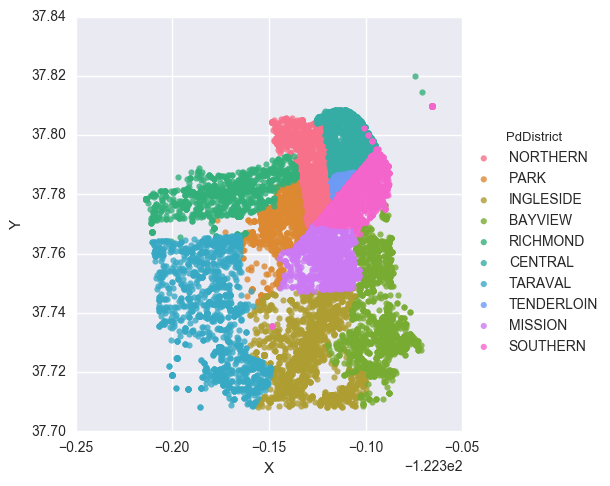

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#coolest plot ever or coolest plot EVER? credit to J from DSI3
sns.lmplot(x='X', y='Y', hue='PdDistrict', fit_reg=False, data=sf_crime)
plt.show()

In [6]:
sf_crime['Dates'] = pd.to_datetime(sf_crime.Dates) #turn this into datetime

In [7]:
sf_crime['date'] = sf_crime['Dates'].dt.date
sf_crime['time'] = sf_crime['Dates'].dt.time
sf_crime['month'] = sf_crime['Dates'].dt.month
sf_crime['day'] = sf_crime['Dates'].dt.day
sf_crime['hour']= sf_crime['Dates'].dt.hour

#get every single thing from datetime possible!
sf_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date,time,month,day,hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,5,13,23


In [8]:

# Figuring out where that wrong data exists in the DataFrame
sf_crime[sf_crime['Category'] == 'ASSUALT']
# rows 2750 and 4330
sf_crime[sf_crime['Category'] == 'TRESPASSING']
# row 5519

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date,time,month,day,hour
5519,2015-04-16 06:00:00,TRESPASSING,TRESPASSING,Thursday,CENTRAL,"ARREST, BOOKED",300 Block of MONTGOMERY ST,-122.402739,37.792375,2015-04-16,06:00:00,4,16,6


In [9]:
# Issues with data are small enough to be manually changes
sf_crime.set_value(2750, 'Category', 'ASSAULT')
sf_crime.set_value(4330, 'Category', 'ASSAULT')
sf_crime.set_value(5519, 'Category', 'TRESPASS')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date,time,month,day,hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,5,13,23
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015-05-13,23:30:00,5,13,23
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015-05-13,23:30:00,5,13,23
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015-05-13,23:30:00,5,13,23
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015-05-13,23:00:00,5,13,23
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015-05-13,23:00:00,5,13,23


### Build a logit model predicting violent crime versus non-violent crime versus non-crimes.

##### We've given you the various crimes that fall into specific categories so you can use these to create these subcategories 

#### Non-Violent Crimes: bad checks, bribery, drug/narcotic, drunkenness, embezzlement, forgery/counterfeiting, fraud, gambling, liquor, loitering, trespass.

#### Non-Crimes: non-criminal, runaway, secondary codes, suspicious occ, warrants.

#### Violent Crimes: everything else.

###### Hint: What type of model do you need here? What should your "baseline" category be?

In [10]:
sf_crime["Category"] = sf_crime["Category"].astype('category')

nv_crime = [x.upper() for x in "bad checks", "bribery", "drug/narcotic", "drunkenness",
"embezzlement", "forgery/counterfeiting", "fraud", "gambling", "liquor",
"loitering", "trespass"]

nn_crimes = [x.upper() for x in "non-criminal", "runaway", "secondary codes", "suspicious occ", "warrants"]

def score_to_numeric(x):
    for i in nv_crime:
        if i==x:
            return "nv_crime"
    for j in nn_crimes:
        if j==x:
            return "nn_crime"
    else:
        return "v_crime"

sf_crime['cat_code'] = sf_crime['Category'].apply(score_to_numeric)

dummies = pd.get_dummies(sf_crime.cat_code)

sf_crime = sf_crime.join(dummies)

sf_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date,time,month,day,hour,cat_code,nn_crime,nv_crime,v_crime
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,5,13,23,nn_crime,1,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23:53:00,5,13,23,v_crime,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23:33:00,5,13,23,v_crime,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23:30:00,5,13,23,v_crime,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23:30:00,5,13,23,v_crime,0,0,1


In [11]:
#Descript - has high variance, but may be useful within each category
sf_crime.Descript.value_counts()

#Many of these values appear to have a single instance, and it would be an in depth analysis to group them. 
#We will drop it for now, but remember to come back to it if we want to do deeper analysis.
sf_crime.drop('Descript', inplace=True, axis=1)

In [12]:
#Drop address - high variance, X/Y coordinates take place of location descriptor
sf_crime.drop('Address', inplace=True, axis=1)

In [13]:
sf_crime.DayOfWeek.value_counts()

Wednesday    2930
Friday       2733
Saturday     2556
Thursday     2479
Sunday       2456
Monday       2447
Tuesday      2399
Name: DayOfWeek, dtype: int64

In [14]:
#Day of Week - Keep this. We can map the days of the week to integers, because although they are technically
#nominal classes (not ordinal), they do represent progress through the week (ie a higher number means later in the week)
#so we can make these numbers.

#Debate on this decision is welcome!

weekdays = {'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
sf_crime['Weekday'] = sf_crime.DayOfWeek.map(weekdays)
sf_crime.drop('DayOfWeek', inplace=True, axis=1)

#### Fit a model with five folds and lasso regularization
#### Use Cs=15 to test a grid of 15 distinct parameters
#### Remember: Cs describes the inverse of regularization strength

In [15]:
#make a new object called 'data' that sets our y (target) as Category and the other features we like as X
#Note that the 'C' before the feature name indicates that it's categorical. Its absence indicates continues variables.

X = patsy.dmatrix('~ C(PdDistrict) + C(Resolution) + C(Weekday)', sf_crime)

#We need to convert our dmatrix back into a data frame to use the methods we're used to
#It would be okay to use get_dummies instead of patsy, it just requires more typing

X = pd.DataFrame(X, columns=X.design_info.column_names)

In [39]:
#Rather than make y values part of our dmatrix, we can keep y as a series
y = sf_crime['cat_code']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)
#patsy isn't working for me for some reason, so i'll manually do this and come back to it

In [42]:
logreg_cv = LogisticRegressionCV(solver='liblinear') # update inputs here

In [43]:
logreg_cv = LogisticRegressionCV(Cs=15, cv=5, penalty='l1', scoring='accuracy', solver='liblinear')
logreg_cv.fit(X_train, y_train)


LogisticRegressionCV(Cs=15, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring='accuracy', solver='liblinear', tol=0.0001,
           verbose=0)

In [44]:
# find best C per class
print('best C for class:')
best_C = {logreg_cv.classes_[i]:x for i, (x, c) in enumerate(zip(logreg_cv.C_, logreg_cv.classes_))}
print(best_C)

best C for class:
{'nn_crime': 51.794746792312019, 'v_crime': 3.7275937203149381, 'nv_crime': 0.0001}


Here is a reference guide for using regularization.

Regularization - Strength of our regularization
* C - Larger values Specify stronger regularization
* Cs - Smaller values specify stronger regularization. (Inverse of C : 1 over c)
* Area - Refering do those Diamonds and Circles when visualizing Regularization
* Regularization	Decrease	Increase
Penalty	Decrease	Increase
C	Increase	Decrease
Cs	Decrease	Increase
Area	Increase	Decrease
Solver = Algorithm used for Optimization.
- Newton-cg - Handles Multinomial Loss, L2 only
- Sag - Handles Multinomial Loss, Large Datasets, L2 Only, Works best on sclaed data
- lbfgs - Handles Multinomial Loss, L2, Only
- Liblinear - Small Datasets, no Warm Starts
Cs = Increasing this increases penalty and the affect of regularization because it shrinks the contact area.
CV = CrossValidations or number of folds
Penalty = Regularization Tactic, l1 - LASSO, l2 - Ridge

#### Fit regular logit model to 'DRUG/NARCOTIC' and 'BURGLARY' classes; be sure to specify the Y = 1 and Y = 0 classes. Use lasso penalty

#### Build confusion matrices for the models above


#### Run gridsearch using GridSearchCV and 5 folds
#### Score on accuracy; what does this metric tell us?

In [ ]:
logreg = LogisticRegression()
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

#### Find the best parameter

#### Use this parameter to .fit, .predict, and print a classification_report (we've already imported this for you) for our X and Y

#### When looking at the classification report, remember:
##### Precision = True Positives / (True Positives + False Positives)

A precision score of 1 indicates that the classifier never mistakenly added observations from another class. A precision score of 0 would mean that the classifier misclassified every instance of the current class.
 
##### Recall = True Positives / (True Positives + False Negatives)
A recall score of 1 indicates that the classifier correctly predicted (found) all observations of the current class (by implication, no false negatives, or misclassifications of the current class). A recall score of 0 alternatively means that the classifier missed all observations of the current class.

##### F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
The f1-score's best value is 1 and worst value is 0, like the precision and recall scores. It is a useful metric for taking into account both measures at once. 

##### Support is simply the number of observations of the labelled class.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html